<a href="https://colab.research.google.com/github/riteshkantule/Time-Series-Analysis-/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3**
Group 2

Task 1

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats

dataset = yf.download('AAPL')

missing_values = dataset['Adj Close'].isnull().sum()
print("Number of missing values:", missing_values)

dataset['Adj Close'].interpolate(inplace=True)

z_scores = np.abs(stats.zscore(dataset['Adj Close']))
outliers = dataset[np.abs(z_scores) > 3]
dataset = dataset[np.abs(z_scores) <= 3]

print("Number of outliers removed:", len(outliers))


[*********************100%***********************]  1 of 1 completed
Number of missing values: 0
Number of outliers removed: 528


Task 2

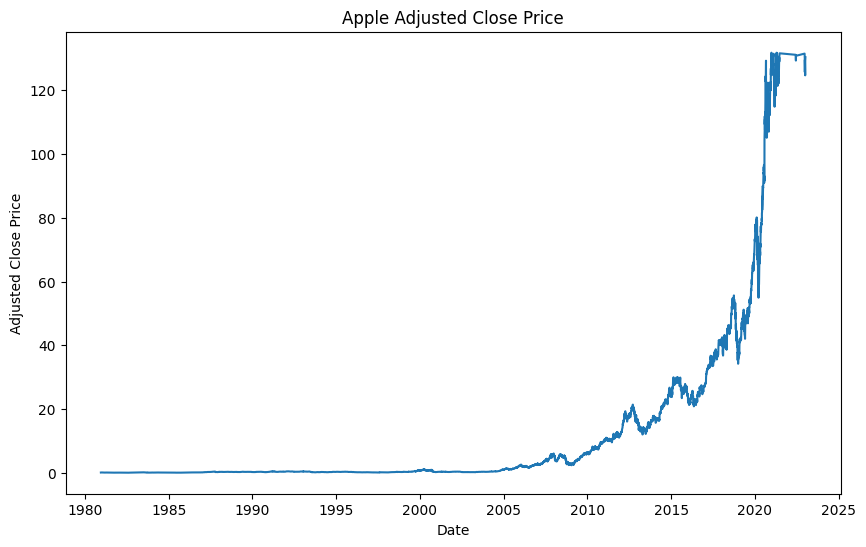

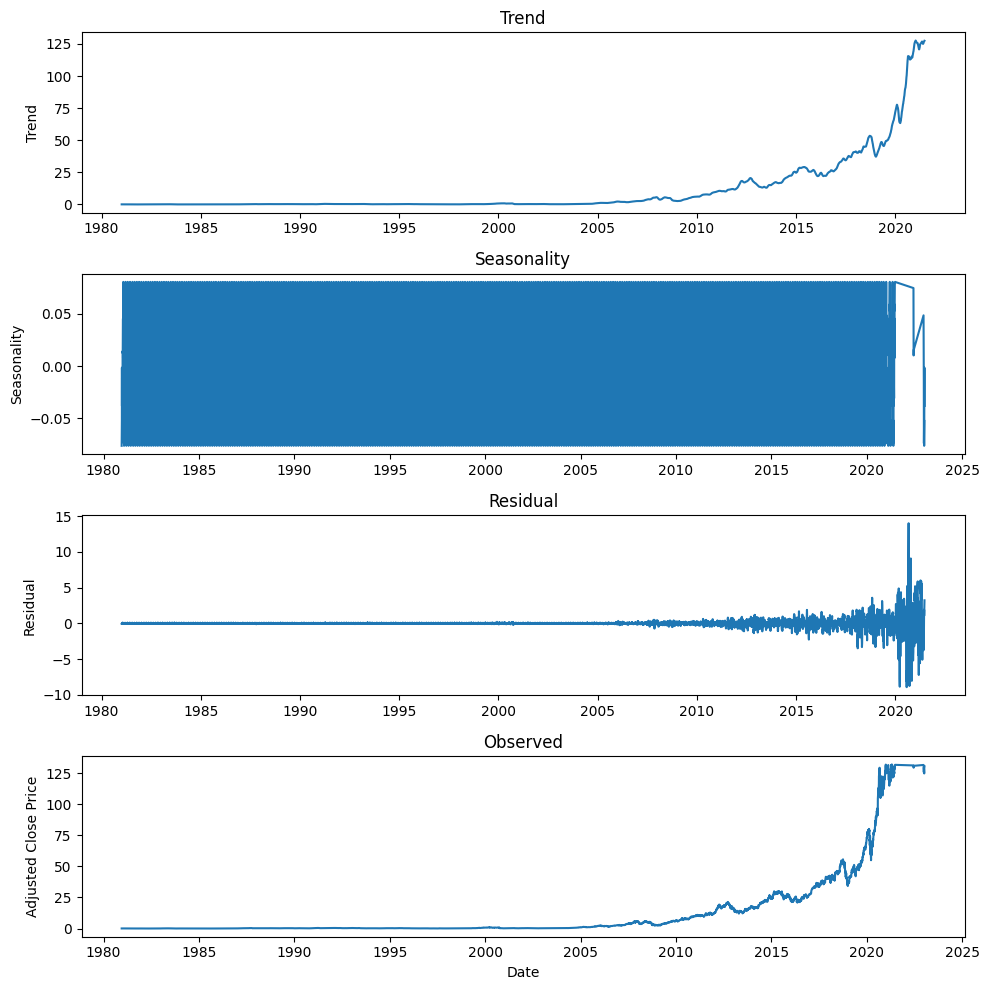

In [16]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10, 6))
plt.plot(dataset.index, dataset['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Apple Adjusted Close Price')
plt.show()

result = seasonal_decompose(dataset['Adj Close'], model='additive', period=30)

plt.figure(figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.ylabel('Trend')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.ylabel('Seasonality')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.ylabel('Residual')
plt.title('Residual')

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Observed')

plt.tight_layout()
plt.show()


Task 3

In [17]:
from statsmodels.tsa.stattools import adfuller, kpss

adf_result_orig = adfuller(dataset['Adj Close'])
print("ADF Test - Original Time Series:")
print(f"ADF Statistic: {adf_result_orig[0]}")
print(f"p-value: {adf_result_orig[1]}")
print("Critical Values:")
for key, value in adf_result_orig[4].items():
    print(f"{key}: {value}")

kpss_result_orig = kpss(dataset['Adj Close'])
print("\nKPSS Test - Original Time Series:")
print(f"KPSS Statistic: {kpss_result_orig[0]}")
print(f"p-value: {kpss_result_orig[1]}")
print("Critical Values:")
for key, value in kpss_result_orig[3].items():
    print(f"{key}: {value}")

adf_result_resid = adfuller(result.resid.dropna())
print("\nADF Test - Residual Series:")
print(f"ADF Statistic: {adf_result_resid[0]}")
print(f"p-value: {adf_result_resid[1]}")
print("Critical Values:")
for key, value in adf_result_resid[4].items():
    print(f"{key}: {value}")

kpss_result_resid = kpss(result.resid.dropna())
print("\nKPSS Test - Residual Series:")
print(f"KPSS Statistic: {kpss_result_resid[0]}")
print(f"p-value: {kpss_result_resid[1]}")
print("Critical Values:")
for key, value in kpss_result_resid[3].items():
    print(f"{key}: {value}")


ADF Test - Original Time Series:
ADF Statistic: 5.7270472889498105
p-value: 1.0
Critical Values:
1%: -3.430993477827981
5%: -2.8618243794308715
10%: -2.566921370028567

KPSS Test - Original Time Series:
KPSS Statistic: 7.8590296085877265
p-value: 0.01
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(



ADF Test - Residual Series:
ADF Statistic: -22.241247736078467
p-value: 0.0
Critical Values:
1%: -3.4309953830304942
5%: -2.8618252213270887
10%: -2.566921818170534

KPSS Test - Residual Series:
KPSS Statistic: 0.0029948475608460043
p-value: 0.1
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Task 4

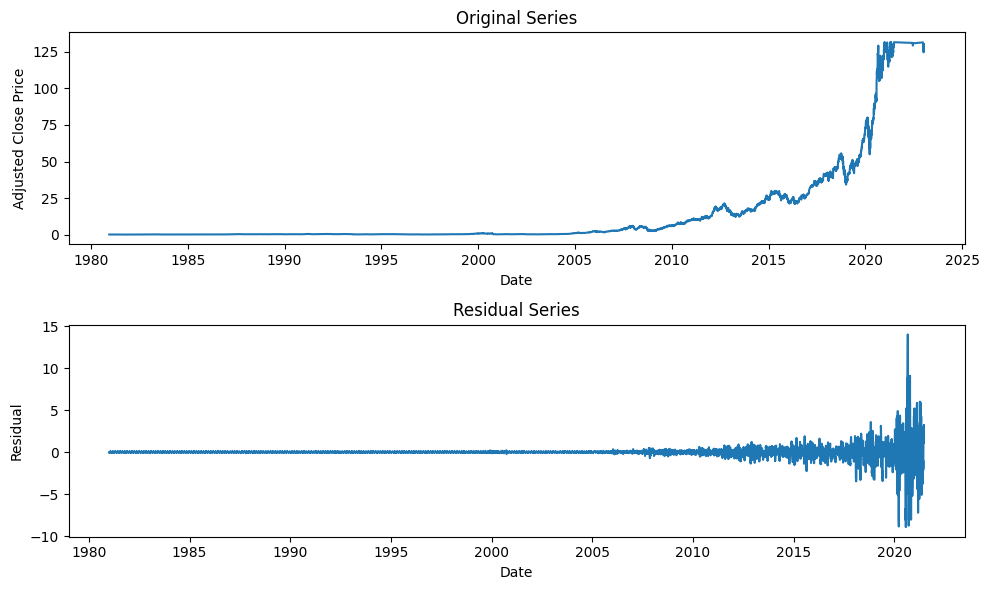

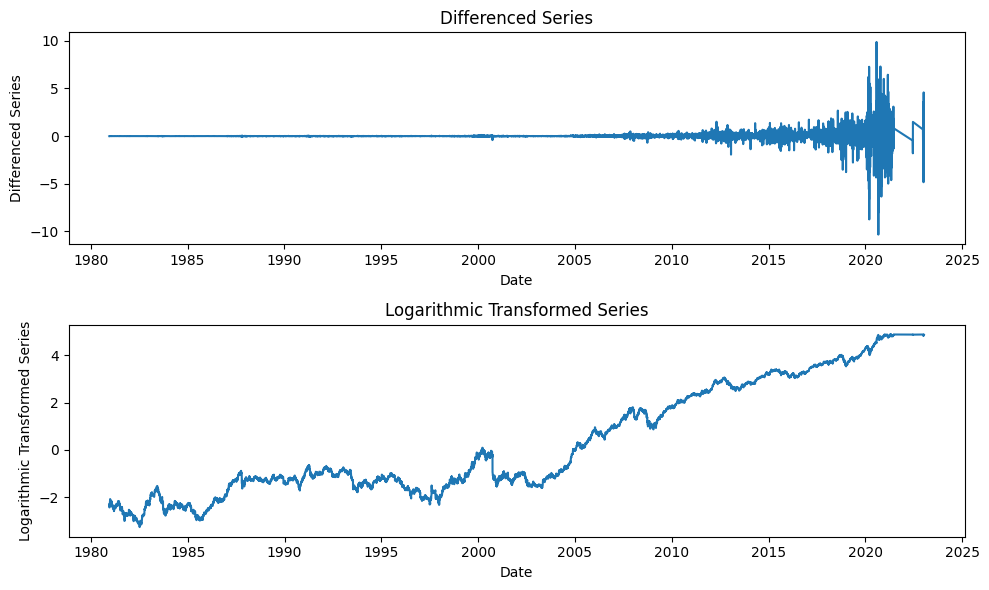

In [18]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(dataset['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Original Series')

plt.subplot(2, 1, 2)
plt.plot(result.resid)
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Series')
plt.tight_layout()
plt.show()

diff_series = dataset['Adj Close'].diff().dropna()

log_series = np.log(dataset['Adj Close'])

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(diff_series)
plt.xlabel('Date')
plt.ylabel('Differenced Series')
plt.title('Differenced Series')

plt.subplot(2, 1, 2)
plt.plot(log_series)
plt.xlabel('Date')
plt.ylabel('Logarithmic Transformed Series')
plt.title('Logarithmic Transformed Series')
plt.tight_layout()
plt.show()


Task 5

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test - Original Series:
Test Statistic: 0.5263742208480835
p-value: 0.0


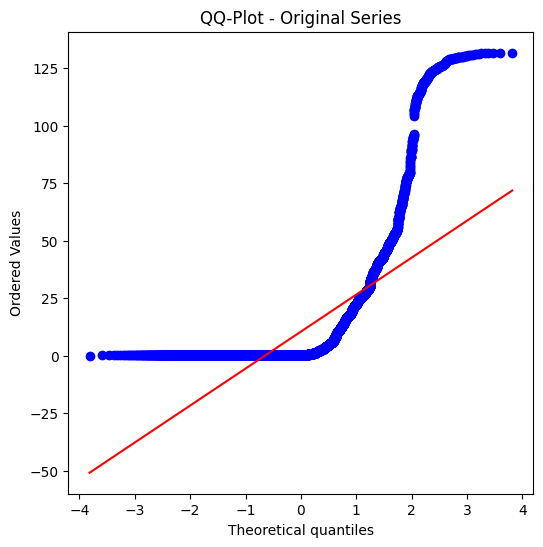


Shapiro-Wilk Test - Transformed Series:
Test Statistic: 0.3743326663970947
p-value: 0.0


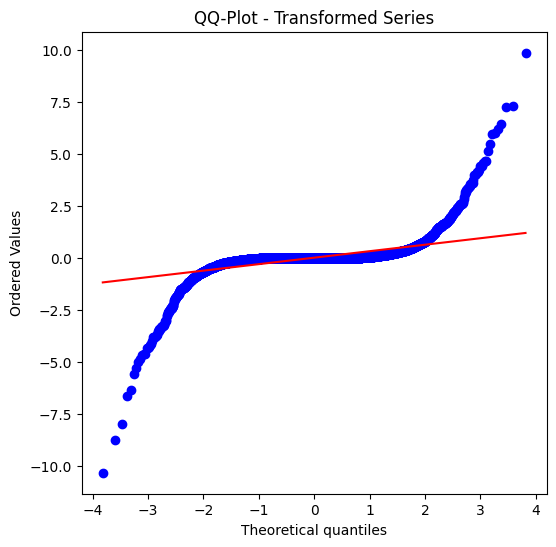

In [19]:
from scipy.stats import shapiro, probplot

shapiro_orig = shapiro(dataset['Adj Close'])
print("Shapiro-Wilk Test - Original Series:")
print(f"Test Statistic: {shapiro_orig[0]}")
print(f"p-value: {shapiro_orig[1]}")

# QQ-plot - Original series
plt.figure(figsize=(6, 6))
probplot(dataset['Adj Close'], plot=plt)
plt.title('QQ-Plot - Original Series')
plt.show()

# Shapiro-Wilk test for normality - Transformed series (e.g., differenced or logarithmic)
shapiro_transformed = shapiro(diff_series)  # Change diff_series to the transformed series you want to test
print("\nShapiro-Wilk Test - Transformed Series:")
print(f"Test Statistic: {shapiro_transformed[0]}")
print(f"p-value: {shapiro_transformed[1]}")

# QQ-plot - Transformed series (e.g., differenced or logarithmic)
plt.figure(figsize=(6, 6))
probplot(diff_series, plot=plt)  # Change diff_series to the transformed series you want to plot
plt.title('QQ-Plot - Transformed Series')
plt.show()


Task 6

Breusch-Pagan Test for Homoscedasticity:
Test Statistic: 302.47512261850204
p-value: nan


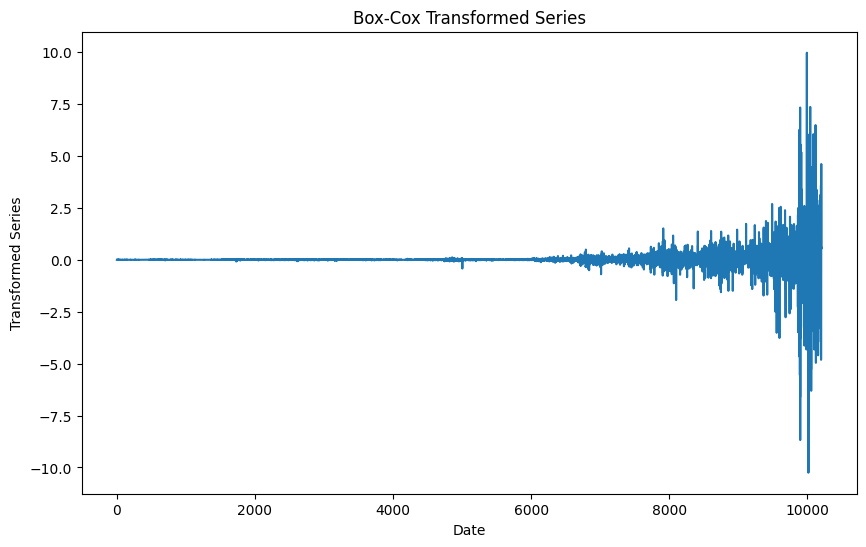

In [20]:
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import boxcox

# Test for homoscedasticity - Transformed series (e.g., differenced or logarithmic)
bp_test = het_breuschpagan(diff_series, np.arange(len(diff_series)).reshape(-1, 1))
print("Breusch-Pagan Test for Homoscedasticity:")
print(f"Test Statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")

# Apply Box-Cox transformation to stabilize variance
from scipy.stats import yeojohnson

# Option 1: Yeo-Johnson transformation
transformed_series, lambda_value = yeojohnson(diff_series)

# Option 2: Shift the data and apply Box-Cox transformation
# shifted_diff_series = diff_series + 0.1  # Add a constant shift to make the data positive
# transformed_series, lambda_value = boxcox(shifted_diff_series)


# Visualize the transformed series
plt.figure(figsize=(10, 6))
plt.plot(transformed_series)
plt.xlabel('Date')
plt.ylabel('Transformed Series')
plt.title('Box-Cox Transformed Series')
plt.show()


Task 7

In [21]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into training and testing sets
train_size = int(len(transformed_series) * 0.8)
train, test = transformed_series[:train_size], transformed_series[train_size:]

# Fit the AR model
model = AutoReg(train, lags=1)  # Adjust the lags parameter as needed
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

# Calculate evaluation metrics
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print("AR Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


AR Model Evaluation:
Mean Squared Error (MSE): 1.2772412228553598
Mean Absolute Error (MAE): 0.6009051474540612


Task 8

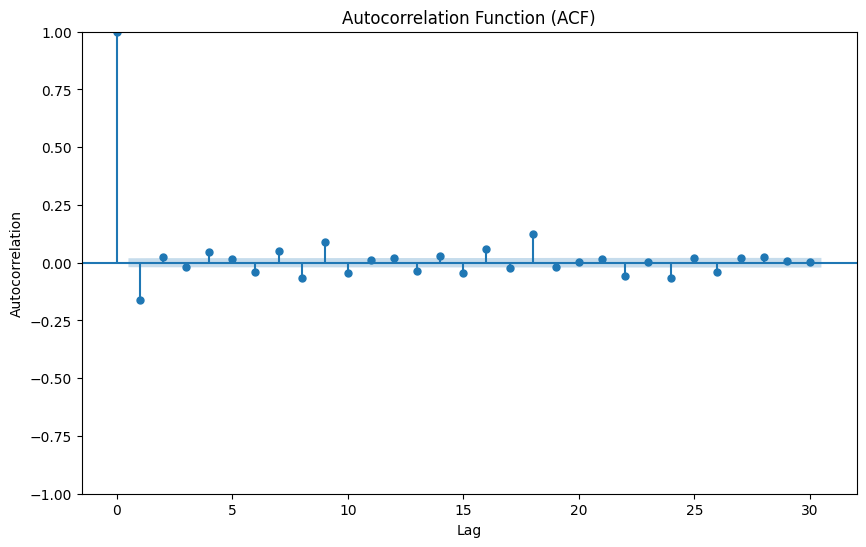

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


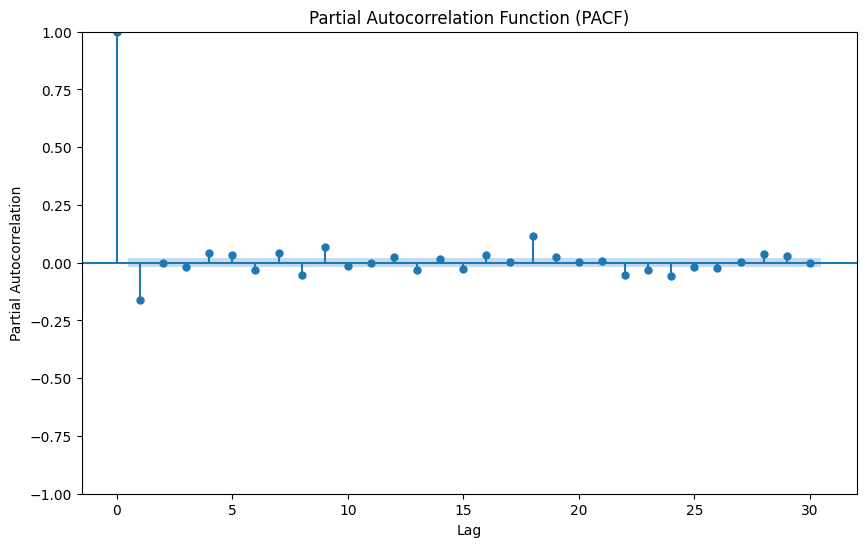

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(transformed_series, ax=ax, lags=30)  # Adjust the lags parameter as needed
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(transformed_series, ax=ax, lags=30)  # Adjust the lags parameter as needed
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()
